# Project Akhir Komputasi Matematika (Klustering)

Library yang harus didownload


*   Pandas untuk mengakses dan memanipulasi data
*   Numpy untuk operasi Numerik
*   Matplotlib untuk memvisualisasikan Data
*   Scikit-Learn untuk algoritma PCA, clustering (K-Means), evaluasi
    matriks seperti Davies-Bouldin Score dan Silhouette Score.







Import Library terlebih **dahulu**

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

Memuat dan Mengedit Data


Kumpulan data ini dibuat hanya untuk tujuan pembelajaran konsep segmentasi pelanggan, yang juga dikenal sebagai analisis keranjang pasar.
File ini berisi informasi dasar (ID, usia, jenis kelamin, pendapatan, skor pengeluaran) tentang pelanggan.

In [2]:
df = pd.read_csv('Mall_Customers.csv')

# Basic statistical details
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Tahap Data Preprocessing**

*1. Mengecek Data yang Hilang*

Untuk menentukan apakah ada data yang hilang

In [3]:
#Missing data check
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

*2. Mengecek Apakah ada data Duplikat*

kita akan melihat apakah dataset yang kami miliki mempunyai data duplikat, setelah dicek ternyata tidak ada dataset yanng duplikat

*3. Data Cleansing*

sekarang kita akan melakukan Data Cleansing yaitu pengurangan Baris yang awalnya kita mempunyai 200 baris lalu menjadi 5 baris paling atas

In [4]:
# Removing duplicate rows
print('Duplicate Rows Count : ', df.duplicated().sum())

df=df.drop_duplicates(keep="first")

#pandas secara default hanya menampilkan 5 baris pertama dalam dataset
df.head()

Duplicate Rows Count :  0


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Mengapa hasil setelah preposition hanya 5 baris pertama dalam dataset? karena di kode bagian ini "df.head()" pandas secara default hanya menampilan 5 baris pertama saja, jika ingin menampilkan 7 baris maka kita ubah kodenya menjadi ini "df.head(7)"

*4. Mengubah Kategori Gender menjadi Angka*

dibawah ini kita Mengubah Kolom Gender menjadi Kode Numerik dimana Laki laki menjadi 1, Perempuan menjadi 0

In [5]:
df["Gender"] = df["Gender"].astype('category').cat.codes
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Tahap menentukan jumlah klaster K optimal berdasarkan perubahan (Elbow Curve)

K Kluster wajib dicari terlebih dahulu karena nanti waktu digunakan untuk menentukan berapa jumlah kluster didalam algoritma K-Means

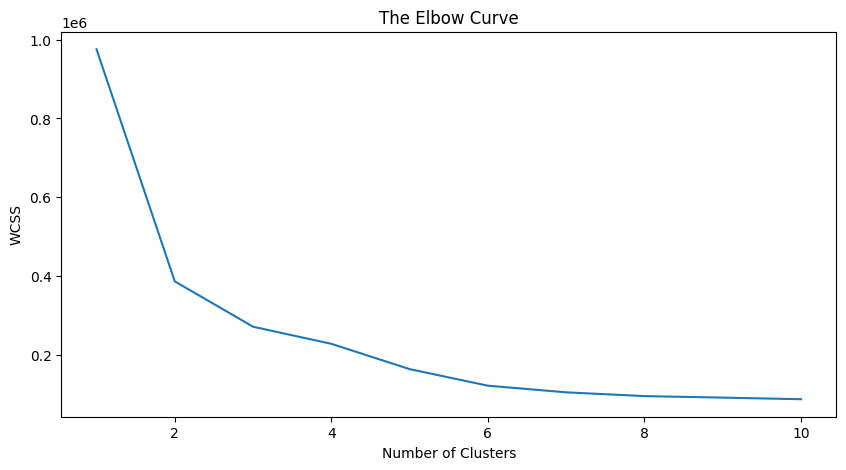

In [6]:
def cluster_Wcss(data, k ):

    wcss = []

    for i in range(1, k):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        
        #metode perhitungan euclid disini
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10,5))
    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

cluster_Wcss(df, 11)

terdapat metode lain yang dicari dalam kode ini yaitu

1. silhouette score untuk mempertimbangkan jarak antar dalam cluster dan juga untuk meningkatkan dan memastikan clustering berkualitas baik

2. Davies-Bouldin Index mengukur kualitas clustering berdasarkan jarak antar cluster dan ukuran cluster

mengapa setelah metode elbow curve kita mencari menggunakan metode lain? karena terkadang elbow curve memberikan hasil yang tidak jelas, lalu metode sihoutte dan davies-bouldin membantu untuk memastikan bahwa jumlah cluster yang dipilih benar-benar optimal.

dibagian bawah ini kita mencari parameter terbaik agar hasil dari clustering juga optimal


**Ekstraksi Fitur terjadi disini**

Analisis Komponen Utama (PCA)

Reduksi dimensi linier menggunakan Dekomposisi Nilai Singular data untuk memproyeksikannya ke ruang dimensi yang lebih rendah.
mula mula kita mempunyai 5 kolom lalu kolom CustomerID dihapus karena tidak mengandung informasi yang relevan sehingga menyisakan 4 fitur (kolom) yaitu Gender, Age, Annual Income (k$), Spending Score (1-100) setelah itu keempat kolom akan di ekstraksi dan menyisakan 2 kolom/Fitur (P1 dan P2)

In [7]:
def pca(data, n):

    if type(n) == int:

        pca = PCA(n_components = n )
        pca.fit(data)
        df_pca = pca.transform(data)
        return df_pca

    else:
        return data

df.drop('CustomerID',axis=1, inplace=True)

#menyisakan 2 kolom PCA
df_pca = pca(df, 2)
df_pca = pd.DataFrame(df_pca, columns = ['P1','P2'])
df_pca.head()

,P1,P2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412


P1 adalah kombinasi linear dari dan menangkap variansi terbesasr data dari kolom (Age dan Spending Score)


P2 adalah kombinasi linear dari dan menangkap terbesar kedua, yang orthogonal (tidak berkorelasi) dengan P1

mengapa hanya 2 fitur? karena dibagian ini codingannya menangkap untuk hanya mengambil 2 fitur "df_pca = pca(df, 2)"

Text(0, 0.5, 'PCA 2')

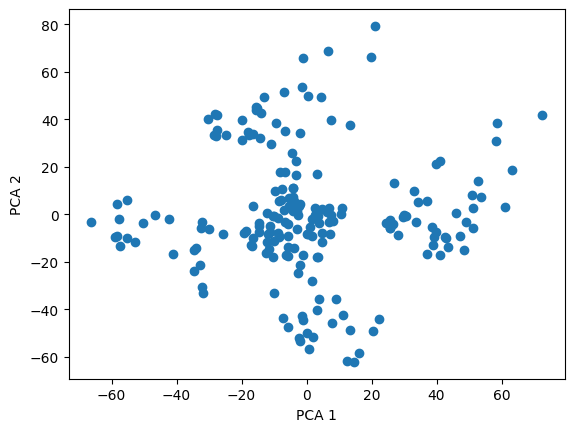

In [8]:
# View of the dataset after PCA

plt.scatter(df_pca.P1, df_pca.P2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

**Menentukan Parameter Terbaik untuk Klustering**

sebelum memasuki klustering, kita harus menentukan parameter terbaik, didalam kodingan ini terdapat proses untuk mencari K-Means nya

In [9]:
param_data = { 'n' : [2,'False'] }
param_data = [dict(zip(param_data.keys(), v)) for v in itertools.product(*param_data.values())]

param_model = {
    'n_clusters': [3, 4, 5 , 6],
    'init' : ['k-means++'],
    'random_state' :[16]
}
param_model = [dict(zip(param_model.keys(), v)) for v in itertools.product(*param_model.values())]

def cluster(data, param_data, param_model):

    last =[]

    for dp in param_data:

        X = pca(data, dp['n'])
        X = pd.DataFrame(X)
        for mp in param_model:

            model = KMeans(**mp)

            y_means = model.fit_predict(X)
            centers = model.cluster_centers_

            silhouette = silhouette_score(X, y_means)
            davies_bouldin = davies_bouldin_score(X, y_means)

            res = {}
            res['Model'] = 'Kmeans'
            res['Random_State'] = mp['random_state']

            res['Pca'] = dp['n']
            res['Params'] = mp
            res['Centers'] = centers
            res['Silhouette'] = silhouette
            res['Davies_Bouldin'] = davies_bouldin

            last.append(res)

    result = pd.DataFrame(last, columns=['Model','Pca','Params', 'Centers', 'Silhouette', 'Davies_Bouldin'])

    return result

result =  cluster(df,  param_data, param_model)
result = result.sort_values(by=['Silhouette'], ascending=False)
result.head()

,Model,Pca,Params,Centers,Silhouette,Davies_Bouldin
2,Kmeans,2,"{'n_clusters': 5, 'init': 'k-means++', 'random...","[[-44.38675468228104, -10.050438135162862], [4...",0.552626,0.584301
1,Kmeans,2,"{'n_clusters': 4, 'init': 'k-means++', 'random...","[[-13.540382521253395, -5.49000439276043], [41...",0.494651,0.690497
7,Kmeans,False,"{'n_clusters': 6, 'init': 'k-means++', 'random...","[[0.4090909090909091, 44.31818181818182, 25.77...",0.451356,0.754751
0,Kmeans,2,"{'n_clusters': 3, 'init': 'k-means++', 'random...","[[-10.226834734150389, -12.85613466828902], [4...",0.451053,0.731013
3,Kmeans,2,"{'n_clusters': 6, 'init': 'k-means++', 'random...","[[-44.38675468228104, -10.050438135162862], [4...",0.449792,0.700036


Mengoptimalkan Proses Clustering dengan Pemilihan Parameter PCA dan K-Means

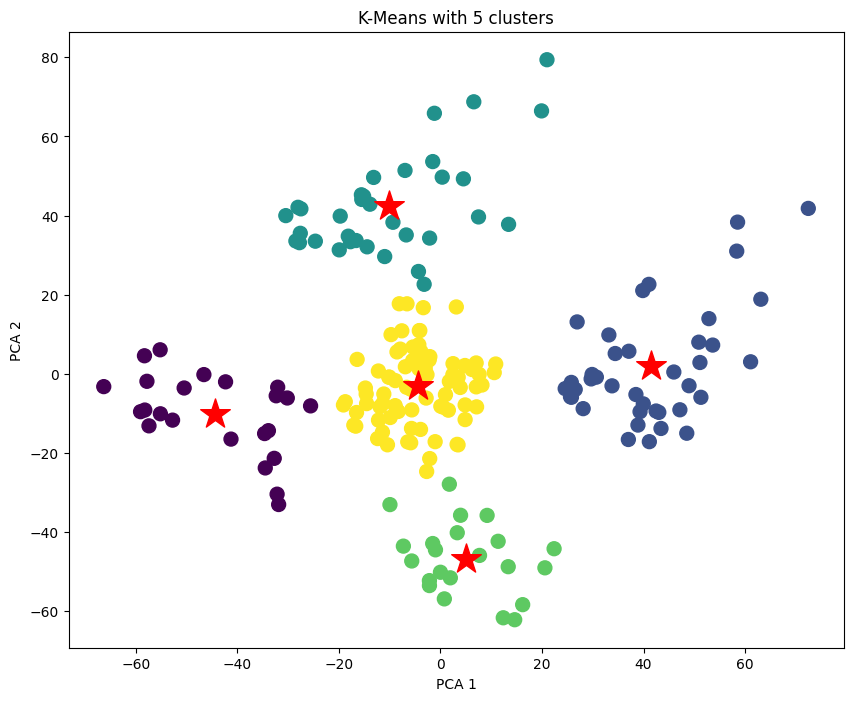

  Cluster Gender                                                Age  ...  \
           count      mean       std  min  25%  50%  75%  max count  ...   
0       0   23.0  0.391304  0.499011  0.0  0.0  0.0  1.0  1.0  23.0  ...   
1       1   39.0  0.461538  0.505035  0.0  0.0  0.0  1.0  1.0  39.0  ...   
2       2   34.0  0.558824  0.503995  0.0  0.0  1.0  1.0  1.0  34.0  ...   
3       3   22.0  0.409091  0.503236  0.0  0.0  0.0  1.0  1.0  22.0  ...   
4       4   82.0  0.402439  0.493407  0.0  0.0  0.0  1.0  1.0  82.0  ...   

  Annual Income (k$)        Spending Score (1-100)                        \
                 75%    max                  count       mean        std   
0              33.00   39.0                   23.0  20.913043  13.017167   
1              95.00  137.0                   39.0  82.128205   9.364489   
2              97.75  137.0                   34.0  16.764706   9.881292   
3              32.25   39.0                   22.0  79.363636  10.504174   
4          

In [10]:
# Mendapatkan parameter terbaik untuk KMeans dan PCA
bp = result.Params[2]   # parameter terbaik yang telah dihitung di atas
bn = result.Pca[2]      # parameter terbaik untuk PCA
bc = result.Centers[2]  # titik pusat terbaik untuk clustering

# Training the model with the best parameters
X = pca(df, bn)
X = pd.DataFrame(X, columns=['P1', 'P2'])

# Melakukan clustering dengan KMeans
model = KMeans(**bp)
y_means = model.fit_predict(X)

# Menambahkan label cluster ke dataframe
df['Cluster'] = y_means

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
plt.title('K-Means with 5 clusters')
plt.scatter(X.P1, X.P2, c=y_means, s=100)
plt.scatter(bc[:, 0], bc[:, 1], color='red', marker='*', s=500)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Melihat statistik deskriptif untuk setiap cluster
cluster_summary = df.groupby('Cluster').describe().reset_index()

# Memeriksa kolom yang ada untuk memahami struktur DataFrame
print(cluster_summary.head())  # Cek struktur awal DataFrame sebelum manipulasi

# Menamai ulang kolom dengan rapi (jika diperlukan)
# Jika hasil describe sudah berisi multi-level kolom, kita akan membuatnya lebih sederhana
# Misalnya, 'mean' untuk setiap kolom fitur dalam cluster
cluster_summary.columns = ['Cluster'] + [f'{stat}_{col}' for col, stat in cluster_summary.columns[1:]]
print("\nStatistik deskriptif per cluster dalam DataFrame:")
print(cluster_summary)

# Melihat rata-rata dari setiap fitur berdasarkan cluster dalam DataFrame
cluster_means = df.groupby('Cluster').mean().reset_index()
print("\nRata-rata setiap fitur per cluster dalam DataFrame:")
print(cluster_means)

# Distribusi tiap fitur (misalnya 'Age', 'Annual Income (k$)', 'Spending Score (1-100)') per cluster
for feature in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:  # sesuaikan dengan nama kolom yang ada
    if feature in df.columns:
        dist = df.groupby('Cluster')[feature].describe().reset_index()
        print(f"\nDistribusi {feature} per cluster dalam DataFrame:")
        print(dist)


Hasilnya adalah kita mempunyai 5 Kluster berdasarkan perhitungan parameter kodingan diatas yang dimana setiap kluster seperti ini

1. kluster 0 (warna ungu)
   Proporsi gender pria sekitar 39% dan wanita 61%, untuk usia rata rata 45 tahun, pendapatan rata rata 26,3k, dengan skor belanja rendah dibawah 40.
   kluster 0 mewakili kelompok berpenghasilan rendah dan memiliki kebiasaan belanja yang rendah

2. kluster 1 (warna biru)
   proporsi gender pria sekitar 46% dan wanita 54%, untuk usia rata rata 32,7 tahun, pendapatan rata rata 86,5k, dengan skor belanja tinggi dengan rata rata 82,1.
   kluster 1 mewakili berpenghasilan tinggi dan kebiasaan belanja yang tinggi
3. kluster 2 (warna hijau gelap)
   proporsi gender pria tinggi di 56% dan wanita 44%, untuk usia rata rata 41,6 tahun, pendapatan rata rata 88,7k, dengan skor belanja rendah dengan rata rata 16,8
   kluster 2 mewakili berpenghasilan tinggi dan kebiasaan belanja yang rendah
4. kluster 3 (warna hijau terang)
   proporsi gender pria sekitar 41% dan wanita 59%, untuk usia rata rata 25,3 tahun, pendapatan rata rata 25,7k, dengan skor belanja sangat tinggi diatas 79,4
   kluster 3 mewakili kelompok berpenghasilan rendah dan kebiasaan belanja yang tinggi
5. kluster 4 (warna kuning)
   proporsi gender pria sekitar 40% dan wanita 60%, untuk usia rata rata 42,5 tahun, pendapatan rata rata 55,5k, dengan skor belanja yang moderat yaitu 49,3
   kluster 4 mewakili kelompok berpenghasilan menengah dan kebiasaan belanja yang moderat

**Kesimpulan**

1. Dataset Mall_Customers berhasil kami kelompokkan menjadi 5 kluster berdasarkan hasil evaluasi dan perhitungan terbaik

2. Hasil evaluasi menunjukkan bahwa parameter paling optimal (tertinggi) terjadi pada metode silhoutte score, parameter terbaik yang dipilih adalah 5 Kluster (K-Means) dan 2 Komponen (PCA)

